In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

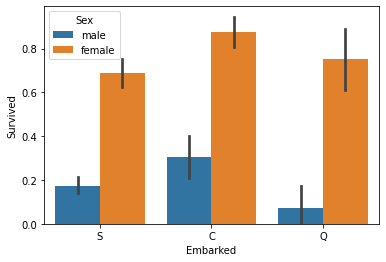

In [5]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_data)

In [6]:
def missing_value_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)
    print(pd.concat([total, percent], axis=1, keys=['Total','Percent']))

missing_value_percentage(train_data)
missing_value_percentage(test_data)

             Total  Percent
Cabin          687    77.10
Age            177    19.87
Embarked         2     0.22
Fare             0     0.00
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
Survived         0     0.00
PassengerId      0     0.00
             Total  Percent
Cabin          327    78.23
Age             86    20.57
Fare             1     0.24
Embarked         0     0.00
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
PassengerId      0     0.00


In [7]:
def column_percent_value(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [8]:
column_percent_value(train_data, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [9]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Text(0.5, 1.0, 'Test Set')

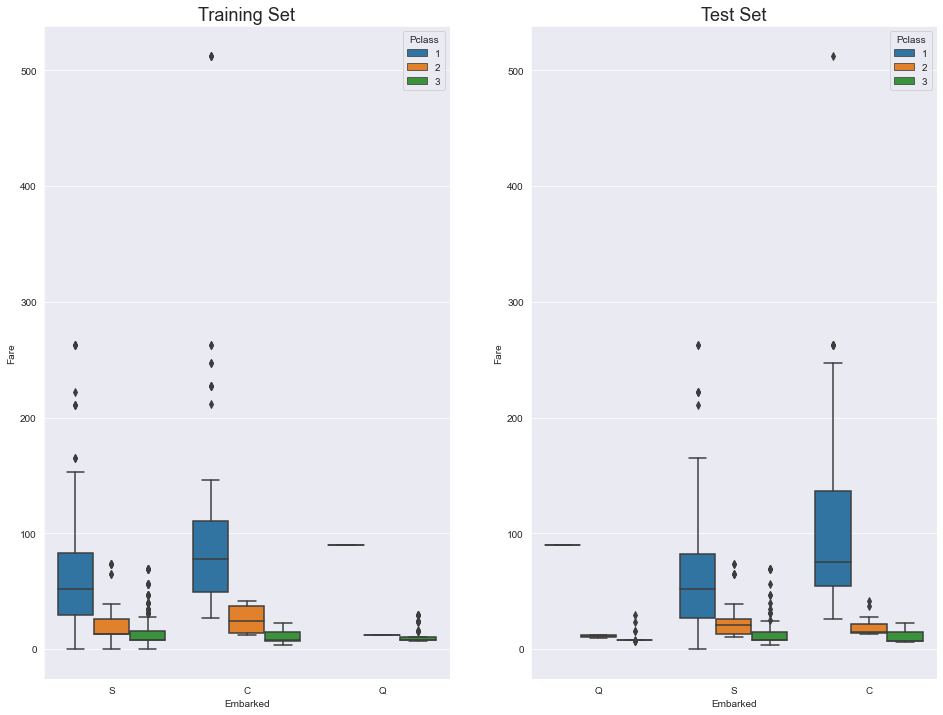

In [10]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train_data, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test_data, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)


In [11]:
train_data.Embarked.fillna("C", inplace=True)

In [12]:
column_percent_value(train_data, 'Cabin')

,Total,Percent
NaN,687,77.10
G6,4,0.45
B96 B98,4,0.45
C23 C25 C27,4,0.45
E101,3,0.34
...,...,...
C87,1,0.11
C86,1,0.11
E77,1,0.11
B42,1,0.11


In [24]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Fare', 'Ticket', 'Name'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

train_data = transform_features(train_data)
test_data = transform_features(test_data)
train_data.describe(include='all')

NameError: name 'total' is not defined

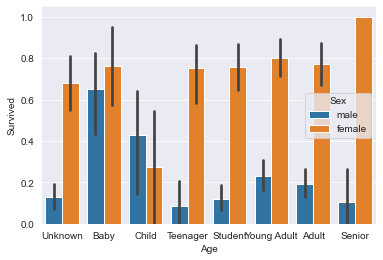

In [140]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=train_data);

In [14]:
from sklearn import preprocessing

def encode_features(df_train, df_test):
    features = ['Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
train_data, test_data = encode_features(train_data, test_data)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Lname,NamePrefix
0,1,0,3,1,4,1,0,7,S,100,19
1,2,1,1,0,0,1,0,2,C,182,20
2,3,1,3,0,7,0,0,7,S,329,16
3,4,1,1,0,7,1,0,2,S,267,20
4,5,0,3,1,7,0,0,7,S,15,19


In [15]:
features = ["Pclass", "Sex", "Age", "NamePrefix", 'SibSp', 'Parch']
# X = train_data.drop(['Survived', 'PassengerId'], axis=1)
# y = train_data['Survived']

X = pd.get_dummies(train_data[features])
y = train_data['Survived']

# X_test = pd.get_dummies(test_data[features])
# Y_test = test_data['Survived']

test_data = pd.get_dummies(test_data[features])
test_data.head()

,Pclass,Sex,Age,NamePrefix,SibSp,Parch
0,3,1,7,19,0,0
1,3,0,0,20,1,0
2,2,1,3,19,0,0
3,3,1,7,19,0,0
4,3,0,4,20,1,1


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [17]:
insert_col = pd.read_csv('./input/test.csv')

In [157]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
clf_random_forest.fit(X, y)

prediction = clf_random_forest.predict(test_data)
output = pd.DataFrame({'PassengerId': insert_col.PassengerId, 'Survived': prediction})
output.to_csv('submission_v4.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV

In [20]:


models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=10000), 
          "Random Forest": RandomForestClassifier(),
          "SVC" : SVC(probability=True),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "AdaBoostClassifier" : AdaBoostClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier(),
          "GaussianNB" : GaussianNB(),
          "LinearDiscriminantAnalysis" : LinearDiscriminantAnalysis(),
          "QuadraticDiscriminantAnalysis" : QuadraticDiscriminantAnalysis()}
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Predicting target values
        y_pred = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        #model_scores[name] = model.score(X_test, y_test)
        model_scores[name] = roc_auc_score(y_pred, y_test)
    return model_scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.8025020938023452,
 'Logistic Regression': 0.778038138332256,
 'Random Forest': 0.8134697490367593,
 'SVC': 0.7235221674876848,
 'DecisionTreeClassifier': 0.7826558265582656,
 'AdaBoostClassifier': 0.8156410256410257,
 'GradientBoostingClassifier': 0.8156410256410257,
 'GaussianNB': 0.7425282525450639,
 'LinearDiscriminantAnalysis': 0.7716185092127302,
 'QuadraticDiscriminantAnalysis': 0.7396798227950061}

In [22]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train, y_train)

prediction = clf_random_forest.predict(test_data)
output = pd.DataFrame({'PassengerId': insert_col.PassengerId, 'Survived': prediction})
output.to_csv('submission_v5.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
